Libraries Used For Alzheimer Prediction

In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

Loading data from csv dataset

In [2]:
df=pd.read_csv("alzheimers_prediction_dataset.csv")

In [3]:
df_head = df.head()
df_head

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


alyzing data

In [4]:
df_info = df.info()
df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  object 
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  object 
 6   Smoking Status                        74283 non-null  object 
 7   Alcohol Consumption                   74283 non-null  object 
 8   Diabetes                              74283 non-null  object 
 9   Hypertension                          74283 non-null  object 
 10  Cholesterol Level                     74283 non-null  object 
 11  Family History 

In [5]:
df.describe()

,Age,Education Level,BMI,Cognitive Test Score
count,74283.000000,74283.000000,74283.000000,74283.000000
mean,71.964703,9.487514,26.780639,64.654241
std,12.980748,5.757020,4.764679,20.153247
min,50.000000,0.000000,18.500000,30.000000
25%,61.000000,4.000000,22.700000,47.000000
50%,72.000000,9.000000,26.800000,65.000000
75%,83.000000,14.000000,30.900000,82.000000
max,94.000000,19.000000,35.000000,99.000000


In [6]:
df.count()

Country                                 74283
Age                                     74283
Gender                                  74283
Education Level                         74283
BMI                                     74283
Physical Activity Level                 74283
Smoking Status                          74283
Alcohol Consumption                     74283
Diabetes                                74283
Hypertension                            74283
Cholesterol Level                       74283
Family History of Alzheimer’s           74283
Cognitive Test Score                    74283
Depression Level                        74283
Sleep Quality                           74283
Dietary Habits                          74283
Air Pollution Exposure                  74283
Employment Status                       74283
Marital Status                          74283
Genetic Risk Factor (APOE-ε4 allele)    74283
Social Engagement Level                 74283
Income Level                      

In [7]:
df.nunique()

Country                                  20
Age                                      45
Gender                                    2
Education Level                          20
BMI                                     166
Physical Activity Level                   3
Smoking Status                            3
Alcohol Consumption                       3
Diabetes                                  2
Hypertension                              2
Cholesterol Level                         2
Family History of Alzheimer’s             2
Cognitive Test Score                     70
Depression Level                          3
Sleep Quality                             3
Dietary Habits                            3
Air Pollution Exposure                    3
Employment Status                         3
Marital Status                            3
Genetic Risk Factor (APOE-ε4 allele)      2
Social Engagement Level                   3
Income Level                              3
Stress Levels                   

In [8]:
df.isnull().sum()

Country                                 0
Age                                     0
Gender                                  0
Education Level                         0
BMI                                     0
Physical Activity Level                 0
Smoking Status                          0
Alcohol Consumption                     0
Diabetes                                0
Hypertension                            0
Cholesterol Level                       0
Family History of Alzheimer’s           0
Cognitive Test Score                    0
Depression Level                        0
Sleep Quality                           0
Dietary Habits                          0
Air Pollution Exposure                  0
Employment Status                       0
Marital Status                          0
Genetic Risk Factor (APOE-ε4 allele)    0
Social Engagement Level                 0
Income Level                            0
Stress Levels                           0
Urban vs Rural Living             

Converting the types 


In [9]:
df['BMI'] = df['BMI'].astype('int64')

In [10]:
df.columns.to_list()


['Country',
 'Age',
 'Gender',
 'Education Level',
 'BMI',
 'Physical Activity Level',
 'Smoking Status',
 'Alcohol Consumption',
 'Diabetes',
 'Hypertension',
 'Cholesterol Level',
 'Family History of Alzheimer’s',
 'Cognitive Test Score',
 'Depression Level',
 'Sleep Quality',
 'Dietary Habits',
 'Air Pollution Exposure',
 'Employment Status',
 'Marital Status',
 'Genetic Risk Factor (APOE-ε4 allele)',
 'Social Engagement Level',
 'Income Level',
 'Stress Levels',
 'Urban vs Rural Living',
 'Alzheimer’s Diagnosis']

In [11]:
def dataEncoder(cols):
    for i in cols:
         dataLabelEncoder = LabelEncoder()
         df[i] = dataLabelEncoder.fit_transform(df[i])

columns = ['Country',
 'Age',
 'Gender',
 'Education Level',
 'BMI',
 'Physical Activity Level',
 'Smoking Status',
 'Alcohol Consumption',
 'Diabetes',
 'Hypertension',
 'Cholesterol Level',
 'Family History of Alzheimer’s',
 'Cognitive Test Score',
 'Depression Level',
 'Sleep Quality',
 'Dietary Habits',
 'Air Pollution Exposure',
 'Employment Status',
 'Marital Status',
 'Genetic Risk Factor (APOE-ε4 allele)',
 'Social Engagement Level',
 'Income Level',
 'Stress Levels',
 'Urban vs Rural Living',
 'Alzheimer’s Diagnosis']
dataEncoder(columns)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   Country                               74283 non-null  int64
 1   Age                                   74283 non-null  int64
 2   Gender                                74283 non-null  int64
 3   Education Level                       74283 non-null  int64
 4   BMI                                   74283 non-null  int64
 5   Physical Activity Level               74283 non-null  int64
 6   Smoking Status                        74283 non-null  int64
 7   Alcohol Consumption                   74283 non-null  int64
 8   Diabetes                              74283 non-null  int64
 9   Hypertension                          74283 non-null  int64
 10  Cholesterol Level                     74283 non-null  int64
 11  Family History of Alzheimer’s         742

In [13]:
df.isnull().mean() * 100

Country                                 0.0
Age                                     0.0
Gender                                  0.0
Education Level                         0.0
BMI                                     0.0
Physical Activity Level                 0.0
Smoking Status                          0.0
Alcohol Consumption                     0.0
Diabetes                                0.0
Hypertension                            0.0
Cholesterol Level                       0.0
Family History of Alzheimer’s           0.0
Cognitive Test Score                    0.0
Depression Level                        0.0
Sleep Quality                           0.0
Dietary Habits                          0.0
Air Pollution Exposure                  0.0
Employment Status                       0.0
Marital Status                          0.0
Genetic Risk Factor (APOE-ε4 allele)    0.0
Social Engagement Level                 0.0
Income Level                            0.0
Stress Levels                   

In [14]:
df.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,16,40,1,1,15,2,2,1,0,0,...,1,0,1,1,0,1,2,0,1,0
1,0,22,1,7,11,2,1,0,0,0,...,1,2,2,2,0,0,1,0,1,0
2,14,36,0,19,4,0,0,1,0,1,...,0,2,0,1,0,1,2,0,0,0
3,4,3,1,17,13,1,2,2,1,0,...,1,2,1,1,0,0,2,1,0,0
4,17,8,0,3,12,0,1,0,1,0,...,2,0,0,0,0,1,2,0,0,0


In [15]:
df.tail()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
74278,12,10,0,3,4,0,1,0,0,0,...,0,0,2,2,0,2,0,2,0,0
74279,18,8,1,18,12,1,2,1,1,0,...,0,2,2,1,0,2,0,0,0,0
74280,16,7,0,13,10,2,2,2,0,0,...,1,1,0,1,1,0,1,1,0,0
74281,2,23,0,7,11,1,2,2,0,0,...,1,1,0,2,0,1,1,0,0,0
74282,11,7,0,1,13,1,0,2,0,0,...,0,1,2,1,0,1,2,2,1,0


Identify outliers with iqr

In [16]:
Q1=df.quantile(0.25)
Q1

Country                                  4.0
Age                                     11.0
Gender                                   0.0
Education Level                          4.0
BMI                                      4.0
Physical Activity Level                  0.0
Smoking Status                           0.0
Alcohol Consumption                      0.0
Diabetes                                 0.0
Hypertension                             0.0
Cholesterol Level                        0.0
Family History of Alzheimer’s            0.0
Cognitive Test Score                    17.0
Depression Level                         0.0
Sleep Quality                            0.0
Dietary Habits                           0.0
Air Pollution Exposure                   0.0
Employment Status                        0.0
Marital Status                           0.0
Genetic Risk Factor (APOE-ε4 allele)     0.0
Social Engagement Level                  0.0
Income Level                             0.0
Stress Lev

In [17]:
Q3=df.quantile(0.75)
Q3

Country                                 14.0
Age                                     33.0
Gender                                   1.0
Education Level                         14.0
BMI                                     12.0
Physical Activity Level                  2.0
Smoking Status                           2.0
Alcohol Consumption                      2.0
Diabetes                                 0.0
Hypertension                             1.0
Cholesterol Level                        1.0
Family History of Alzheimer’s            1.0
Cognitive Test Score                    52.0
Depression Level                         2.0
Sleep Quality                            2.0
Dietary Habits                           2.0
Air Pollution Exposure                   2.0
Employment Status                        2.0
Marital Status                           2.0
Genetic Risk Factor (APOE-ε4 allele)     0.0
Social Engagement Level                  2.0
Income Level                             2.0
Stress Lev

In [18]:
IQR=Q3-Q1
IQR

Country                                 10.0
Age                                     22.0
Gender                                   1.0
Education Level                         10.0
BMI                                      8.0
Physical Activity Level                  2.0
Smoking Status                           2.0
Alcohol Consumption                      2.0
Diabetes                                 0.0
Hypertension                             1.0
Cholesterol Level                        1.0
Family History of Alzheimer’s            1.0
Cognitive Test Score                    35.0
Depression Level                         2.0
Sleep Quality                            2.0
Dietary Habits                           2.0
Air Pollution Exposure                   2.0
Employment Status                        2.0
Marital Status                           2.0
Genetic Risk Factor (APOE-ε4 allele)     0.0
Social Engagement Level                  2.0
Income Level                             2.0
Stress Lev

In [19]:
upper_lim = Q3 + 1.5 * IQR
lower_lim = Q1 - 1.5 * IQR

In [20]:
outliers = ((df < lower_lim) | (df > upper_lim)).sum()
outliers

Country                                     0
Age                                         0
Gender                                      0
Education Level                             0
BMI                                         0
Physical Activity Level                     0
Smoking Status                              0
Alcohol Consumption                         0
Diabetes                                14756
Hypertension                                0
Cholesterol Level                           0
Family History of Alzheimer’s               0
Cognitive Test Score                        0
Depression Level                            0
Sleep Quality                               0
Dietary Habits                              0
Air Pollution Exposure                      0
Employment Status                           0
Marital Status                              0
Genetic Risk Factor (APOE-ε4 allele)    14722
Social Engagement Level                     0
Income Level                      

handling outliers 

In [21]:
for col in ['Diabetes', 'Genetic Risk Factor (APOE-ε4 allele)']:
    mode_value = df[col].mode()[0] 
    df[col] = df[col].mask((df[col] < lower_lim[col]) | (df[col] > upper_lim[col]), mode_value)
print("Remaining outliers : \n ", ((df < lower_lim) | (df > upper_lim)).sum())


Remaining outliers : 
  Country                                 0
Age                                     0
Gender                                  0
Education Level                         0
BMI                                     0
Physical Activity Level                 0
Smoking Status                          0
Alcohol Consumption                     0
Diabetes                                0
Hypertension                            0
Cholesterol Level                       0
Family History of Alzheimer’s           0
Cognitive Test Score                    0
Depression Level                        0
Sleep Quality                           0
Dietary Habits                          0
Air Pollution Exposure                  0
Employment Status                       0
Marital Status                          0
Genetic Risk Factor (APOE-ε4 allele)    0
Social Engagement Level                 0
Income Level                            0
Stress Levels                           0
Urban vs R

In [22]:
df.isnull().sum()

Country                                 0
Age                                     0
Gender                                  0
Education Level                         0
BMI                                     0
Physical Activity Level                 0
Smoking Status                          0
Alcohol Consumption                     0
Diabetes                                0
Hypertension                            0
Cholesterol Level                       0
Family History of Alzheimer’s           0
Cognitive Test Score                    0
Depression Level                        0
Sleep Quality                           0
Dietary Habits                          0
Air Pollution Exposure                  0
Employment Status                       0
Marital Status                          0
Genetic Risk Factor (APOE-ε4 allele)    0
Social Engagement Level                 0
Income Level                            0
Stress Levels                           0
Urban vs Rural Living             

feature engineering

In [23]:
columns_to_drop = [
    'Country', 'Employment Status', 'Marital Status', 
    'Income Level', 'Urban vs Rural Living','BMI'
]
df_cleaned = df.drop(columns=columns_to_drop)

In [24]:
df_cleaned.columns

Index(['Age', 'Gender', 'Education Level', 'Physical Activity Level',
       'Smoking Status', 'Alcohol Consumption', 'Diabetes', 'Hypertension',
       'Cholesterol Level', 'Family History of Alzheimer’s',
       'Cognitive Test Score', 'Depression Level', 'Sleep Quality',
       'Dietary Habits', 'Air Pollution Exposure',
       'Genetic Risk Factor (APOE-ε4 allele)', 'Social Engagement Level',
       'Stress Levels', 'Alzheimer’s Diagnosis'],
      dtype='object')

Creating a new csv after feature engineering and reading the data from csv

In [25]:
df_cleaned.to_csv("Alzheimer_prediction_cleaned.csv", index = False)

In [26]:
df_cleaned.head()

,Age,Gender,Education Level,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,Cholesterol Level,Family History of Alzheimer’s,Cognitive Test Score,Depression Level,Sleep Quality,Dietary Habits,Air Pollution Exposure,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Stress Levels,Alzheimer’s Diagnosis
0,40,1,1,2,2,1,0,0,1,0,60,1,2,1,0,0,1,0,0
1,22,1,7,2,1,0,0,0,1,0,35,1,1,1,2,0,0,0,0
2,36,0,19,0,0,1,0,1,1,0,13,0,1,0,2,0,1,0,0
3,3,1,17,1,2,2,0,0,1,0,51,2,0,1,2,0,0,1,0
4,8,0,3,0,1,0,0,0,1,0,19,0,2,2,0,0,1,0,0


In [27]:
print(df_cleaned.isnull().sum())

Age                                     0
Gender                                  0
Education Level                         0
Physical Activity Level                 0
Smoking Status                          0
Alcohol Consumption                     0
Diabetes                                0
Hypertension                            0
Cholesterol Level                       0
Family History of Alzheimer’s           0
Cognitive Test Score                    0
Depression Level                        0
Sleep Quality                           0
Dietary Habits                          0
Air Pollution Exposure                  0
Genetic Risk Factor (APOE-ε4 allele)    0
Social Engagement Level                 0
Stress Levels                           0
Alzheimer’s Diagnosis                   0
dtype: int64


In [28]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   Age                                   74283 non-null  int64
 1   Gender                                74283 non-null  int64
 2   Education Level                       74283 non-null  int64
 3   Physical Activity Level               74283 non-null  int64
 4   Smoking Status                        74283 non-null  int64
 5   Alcohol Consumption                   74283 non-null  int64
 6   Diabetes                              74283 non-null  int64
 7   Hypertension                          74283 non-null  int64
 8   Cholesterol Level                     74283 non-null  int64
 9   Family History of Alzheimer’s         74283 non-null  int64
 10  Cognitive Test Score                  74283 non-null  int64
 11  Depression Level                      742

Splitting the data and train the data for prediction

In [29]:
X = df_cleaned.drop(columns=['Alzheimer’s Diagnosis'])  
y = df_cleaned['Alzheimer’s Diagnosis'] 


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


visualize the mean values of different features 

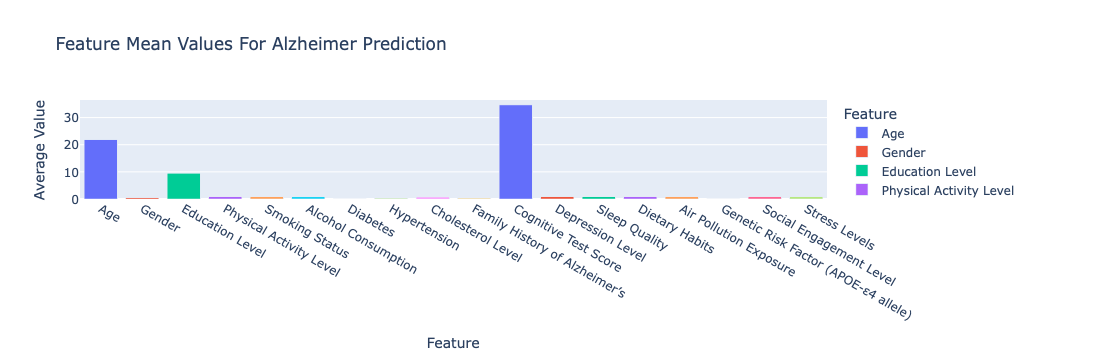

In [59]:
import plotly.express as px

feature_means = df_cleaned.drop(columns=['Alzheimer’s Diagnosis']).mean().reset_index()
feature_means.columns = ['Feature', 'Mean Value']
fig = px.bar(feature_means, x='Feature', y='Mean Value', title='Feature Mean Values For Alzheimer Prediction',
             labels={'Mean Value': 'Average Value'}, color='Feature')
fig.show()


In [32]:
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (59426, 18)
Testing data shape: (14857, 18)


Moldel training for SVC

In [36]:
model_svc = SVC(kernel='rbf', C=1.0, gamma='scale')  
model_svc.fit(X_train, y_train)
print(model_svc)

SVC()


Store the file with the help of pickel 

In [37]:
pickle.dump(model_svc, open('model_svc.pkl', 'wb'))


In [38]:
model_svc = pickle.load(open('model_svc.pkl', 'rb'))

In [39]:
model_predictions = model_svc.predict(X_test)

Accuracy of model and report of it

In [43]:
from sklearn.metrics import classification_report
accuracy = accuracy_score(y_test, model_predictions)
print(f"Model Accuracy: {accuracy:.2%}")


Model Accuracy: 71.94%


In [42]:
print(classification_report(y_test, model_predictions))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      8719
           1       0.65      0.68      0.67      6138

    accuracy                           0.72     14857
   macro avg       0.71      0.71      0.71     14857
weighted avg       0.72      0.72      0.72     14857



training an other model 

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  
rf_model.fit(X_train, y_train)
print(rf_model)

RandomForestClassifier(random_state=42)


In [47]:
import joblib  
joblib.dump(rf_model, "random_forest_model.pkl")  

['random_forest_model.pkl']

In [48]:
loaded_model = joblib.load("random_forest_model.pkl")

In [49]:
new_predictions = loaded_model.predict(X_test)

In [52]:
print(f"Model Accuracy: {accuracy:.2%}")

Model Accuracy: 71.94%


In [53]:
print("Classification Report:\n", classification_report(y_test, new_predictions))


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.76      0.76      8719
           1       0.65      0.64      0.65      6138

    accuracy                           0.71     14857
   macro avg       0.70      0.70      0.70     14857
weighted avg       0.71      0.71      0.71     14857



visualizes the feature importance scores

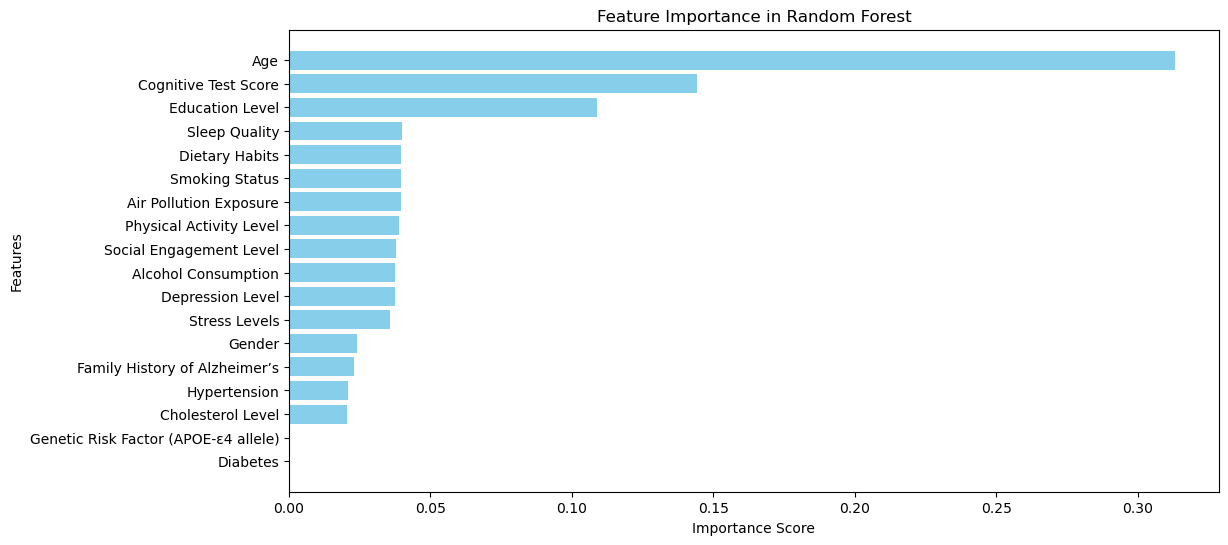

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis()  
plt.show()


evaluating its classification performance.



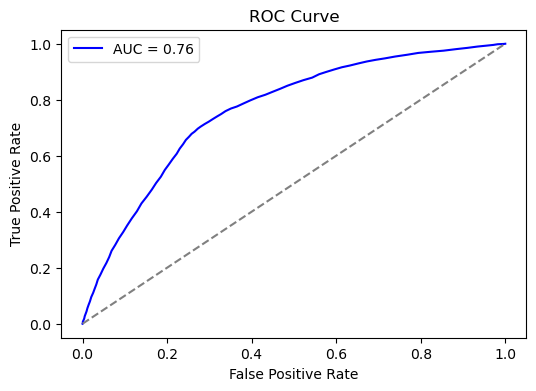

In [62]:
from sklearn.metrics import roc_curve, auc
y_probs = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
